# Goldman equation

The transmembrane potential of a semipermeable membrane is dependent on the concentration [X] and permitivity $g_X$ of ions.
When more than one ion species is considered around a semipermeable membrane the equilibrium potential is given by the Goldmann equation. Considering Sodium and Potassium, the Goldmann eq. is:

$$
V_m ={\frac  {RT}{F}}\ln {\left({\frac  {g_{{{\text{Na}}}}[{\text{Na}}^{{+}}]_{{\mathrm  {out}}}+g_{{{\text{K}}}}[{\text{K}}^{{+}}]_{{\mathrm  {out}}}}{g_{{{\text{Na}}}}[{\text{Na}}^{{+}}]_{{\mathrm  {in}}}+g_{{{\text{K}}}}[{\text{K}}^{{+}}]_{{{\mathrm  {in}}}}}}\right)}
$$
$$
%V_m ={\frac  {RT}{F}}\ln {\left({\frac  {P_{{{\text{Na}}}}[{\text{Na}}^{{+}}]_{{\mathrm  {out}}}+P_{{{\text{K}}}}[{\text{K}}^{{+}}]_{{\mathrm  {out}}}+P_{{{\text{Cl}}}}[{\text{Cl}}^{{-}}]_{{\mathrm  {in}}}}{P_{{{\text{Na}}}}[{\text{Na}}^{{+}}]_{{\mathrm  {in}}}+P_{{{\text{K}}}}[{\text{K}}^{{+}}]_{{{\mathrm  {in}}}}+P_{{{\text{Cl}}}}[{\text{Cl}}^{{-}}]_{{\mathrm  {out}}}}}\right)}
$$

First, the Goldman eq. is defined in python code.
- Run the following code by selecting (click on it) and then pressing SHIFT+ENTER or CTRL+ENTER

## Effect of opening channels

In [10]:
# Some libraries need to be imported
from brian2 import *
from matplotlib import pyplot as plt

# In case you are experiencing problems with the figures,
# comment out the following line. 
%matplotlib ipympl

In [11]:
g_Na_standard = 0.05
g_K_standard = 1.0
Na_in_standard = 15
Na_out_standard = 145
K_in_standard = 140
K_out_standard = 4



def vm_goldmann(g_Na=g_Na_standard,
                g_K=g_K_standard,
                Na_in=Na_in_standard,
                Na_out=Na_out_standard,
                K_in=K_in_standard,
                K_out=K_out_standard):
    """The Goldman-Hodgkin-Katz equation.
       input: Conductivities and concentrations in arbitrary units.
       returns: Vm in volt."""

    # RT/F at room temperature
    prefactor = 26.7e-3  # Volt

    # the conductivity weighted concentration ratio sum
    gc_ratio = (g_Na*Na_out + g_K * K_out)/(g_Na*Na_in + g_K * K_in)

    # Return the transmembrane potential
    vm = prefactor * np.log(gc_ratio)
    return vm

In [7]:
############################################## TODO ############################################## 
# The following values are plotted in the cell below.
# Add more values to see how Vm changes.
g_na_values = [0.05, 0.5, 5]
g_k_values = [1.0, 10]
##################################################################################################

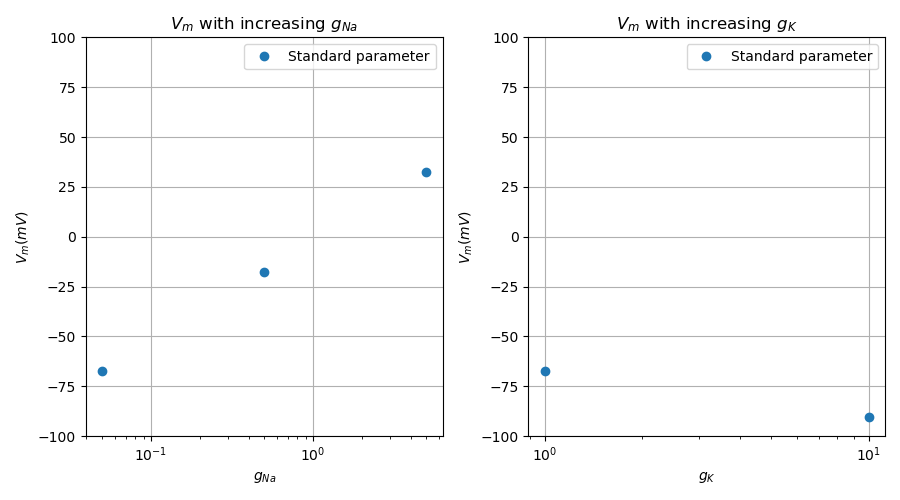

In [12]:
g_Na_list = np.array(g_na_values)
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
axs[0].plot(g_Na_list, 1e3*vm_goldmann(g_Na=g_Na_list), 'o', label='Standard parameter')


############################################## TODO ############################################## 
# Uncomment the next line and tweak the value of K_in
# axs[0].plot(g_Na_list, 1e3*vm_goldmann(g_Na=g_Na_list, K_in=10), 'x', label='Decreased inner potassium')
##################################################################################################


axs[0].semilogx()
axs[0].set_ylabel("$V_m (mV)$")
axs[0].set_title("$V_m$ with increasing $g_{Na}$")
axs[0].set_xlabel("$g_{Na}$")
axs[0].set_ylim(-100, 100)
axs[0].grid()
axs[0].legend()

g_K_list = np.array(g_k_values) #np.logspace(np.log10(1), 3)
axs[1].plot(g_K_list, 1e3*vm_goldmann(g_K=g_K_list), 'o', label='Standard parameter')
axs[1].semilogx()
axs[1].set_ylabel("$V_m (mV)$")
axs[1].set_title("$V_m$ with increasing $g_{K}$")
axs[1].set_xlabel("$g_{K}$")
axs[1].set_ylim(-100, 100)
axs[1].grid()
axs[1].legend()

fig.tight_layout()

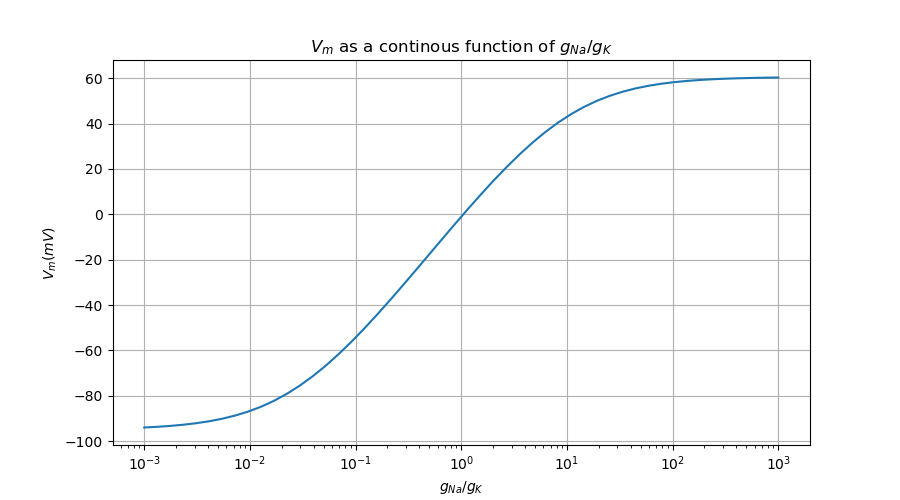

In [9]:
g_Na_list = np.logspace(-3, 3)
g_ratio_list = g_Na_list/g_K_standard
fig, ax = plt.subplots(1,1,figsize=(9,5))
ax.plot(g_ratio_list, 1e3*vm_goldmann(g_Na=g_ratio_list))

ax.semilogx()
ax.set_ylabel("$V_m (mV)$")
ax.set_title("$V_m$ as a continous function of $g_{Na} / g_K$")
ax.grid()
ax.set_xlabel("$g_{Na}/g_K$");
plt.show()

# Current injection at passive Cable

What happens when current is injected in a thin nerve fiber, how does the current spread?


The answer is given by the core-conductor- or cable-model. 
It is a very general model that can be dated back to Lord Kelvin who derived it to describe transatlatic communication cables. Bioelectricity, e.g. in nerve fibers, obeys the same physical laws.
(More generally speaking the cable equation is the one dimensional heat equation. So you can think of a thin metal rod that is heated at one point, how does the heat spread?).

In this model the ion species are not distinguished, there is just one current (of course still with a capacitive and a resistive component). We use a library called Brian to numerically solve the equations.
- The capacitive current is calculated inside of Brian. You just define the specific capacity Cm, and the geometry.
- The resistive current is given by $$ I_m = g_L \cdot (E_L - V_m) $$ 

The following code inject current at one end of a finite (not infinite) passive fiber. 
You may change capacity, Radius, current injection amplitude, leakynes .... 

- Run the following code by selecting (click on it) and then pressing SHIFT+ENTER or CTRL+ENTER

In [16]:
############################################## TODO ############################################## 
# Define the list of parameters that are used
# The following parameter pairs are used in the simulation below.
# Add more value pairs to explore the cable model.
# Format:    [Cm        , gL]
cmgl_list = [
    [1*uF/cm**2, 1e-4*siemens/cm**2],
    #[1*uF/cm**2, 1e-4*siemens/cm**2],
    #[1*uF/cm**2, 1e-4*siemens/cm**2],
   ]
##################################################################################################

Model Nr.0  Cm = 0.01 F/m^2
Model Nr.0  gL = 1. S/m^2
Model Nr.0  Length constant = 0.41 mm
Model Nr.0  Time constante = 10. ms
----------------------------------------


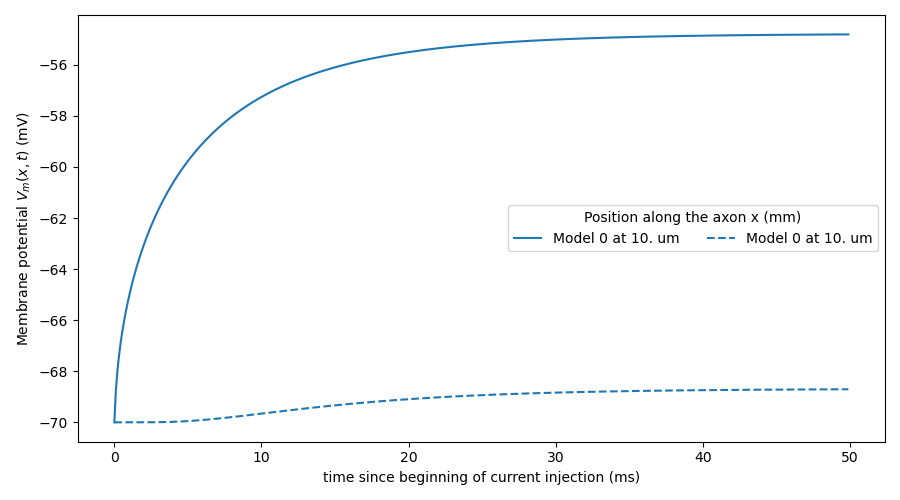

In [27]:
plt.figure('Injection')
fig, ax = plt.subplots(1,1, figsize=(9, 5))

for model_nr, (Cm, gL) in enumerate(cmgl_list):   

    start_scope()
    defaultclock.dt = 0.1*ms
    
    # Morphology
    diameter = 1*um
    length = 4*mm
    Ri = 150*ohm*cm
    N = 200
    morpho = Cylinder(diameter=diameter, length=length, n=N)

    # Passive channels
    EL = -70*mV
    eqs = '''
    Im = gL * (EL - v) : amp/meter**2
    I : amp (point current)
    '''

    neuron = SpatialNeuron(morphology=morpho, model=eqs, Cm=Cm, Ri=Ri,
                           method='exponential_euler')
    neuron.v = EL
    M = StateMonitor(neuron, 'v', record=[0, 50])

    la = neuron.space_constant[0]
    
    print('Model Nr.%i '%model_nr, "Cm =",Cm)
    print('Model Nr.%i '%model_nr, "gL =",gL)
    print('Model Nr.%i '%model_nr, "Length constant = %s" % la.in_best_unit(2))
    print('Model Nr.%i '%model_nr, "Time constante = %s" % (Cm/gL).in_best_unit(2))
    print('----------------------------------------')


    # Currrent injection at one end
    neuron.I[0] = 0.02*nA 

    # Running an plotting
    report = None
    run(.5*ms, report=report)
    run(4.5*ms, report=report)
    run(45*ms, report=report)
    
    ln = ax.plot(M.t/ms, M.v.T[:,0]/mV, '-',
                 label='Model %i at '%model_nr+str(neuron.morphology.distance[M.record[0]]))
    ax.plot(M.t/ms, M.v.T[:,1]/mV, '--', color = ln[0].get_color(),
            label='Model %i at '%model_nr+str(neuron.morphology.distance[M.record[0]]))
    
    
ax.legend(title="Position along the axon x (mm)", loc="best", ncol=2)#, label=x[M.record])
ax.set_xlabel('time since beginning of current injection (ms)')
ax.set_ylabel('Membrane potential $V_m(x, t)$ (mV)')
fig.tight_layout()

# HH Action Potential

An AP is a rapid and propagating jump in the transmembrane potential. There are many models to describe such a process.
The most famous one is the HH model, which is a very detailed purely electrical model.
In the first Section it was found that a change in ion specific permeabilities effects the membrane potential. 

The HH model uses the Goldman eq. and describes the permeabilities with 
voltage and time dependent expressions.
It has more than 20 constant parameters and 3 internal variables (m, n, h).
With so many parameters, various AP shapes can be reproduced.
However, these properties can not be monitored or controlled so easily, and it is not reaally clear what m, n and h represent in an actual neuron.


The following code simuates a HH AP along a long axon, and calculates the propagation velocity.

- Run the following code by selecting (click on it) and then pressing SHIFT+ENTER or CTRL+ENTER
- whats the AP velocity?

The nerve is almost half a millimeter thick and still the AP speed is rather disenchanting (should be around 12 m/s)
You have heard of myelin which wraps around axons and increases the AP propagation speed.
We can include the insulating effect of myelin by decreasing the leak condictivity $g_L$.
(Note, divide $g_L$ by 2 would double the so called Electrotonic length or "length parameter")

- Try to make the AP double its speed by decresing $g_L$.
  What is the relation between length parameter and propagation speed?

- Change $C_m$ to reach the desired velocity.

- Bonus for fun: Are there other ways to accelerate the AP?

In [41]:
# The following parameter sets are used.
HH_parameters = [
    {
    'Cm': 1 * uF / cm**2,
    'Ri': 35.4 * ohm * cm,
    'gl': 0.4 * msiemens / cm**2,
    'diameter': 2 * 238 * um,
    'label': 'Standard'
    }, 
############################################## TODO ##############################################
# Add more parameter sets to investigate the effect on the propagation velocity.
#    {
#    'Cm': 1 * uF / cm**2,
#    'Ri': 35.4 * ohm * cm,
#    'gl': 0.000001 * msiemens / cm**2,
#    'diameter': 2 * 238 * um,
#    'label': 'no leak'
#    },
##################################################################################################
]

------------------- Running simulation ---------------------
Length constante: 3.56 mm
Time constante: 2.5 ms
------------------------  Start ----------------------------
Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Length constante: 1.09 mm
Starting simulation at t=23. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s
------------------------  Done  ----------------------------
  Velocity = 12.03 m/s
------------------- Running simulation ---------------------
Length constante: 3.87 mm
Time constante: 1. ks
------------------------  Start ----------------------------
Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Length constante: 4.62 mm
Starting simulation at t=23. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s
------------------------  Done  ----------------------------
  Velocity = 12.31 m/s


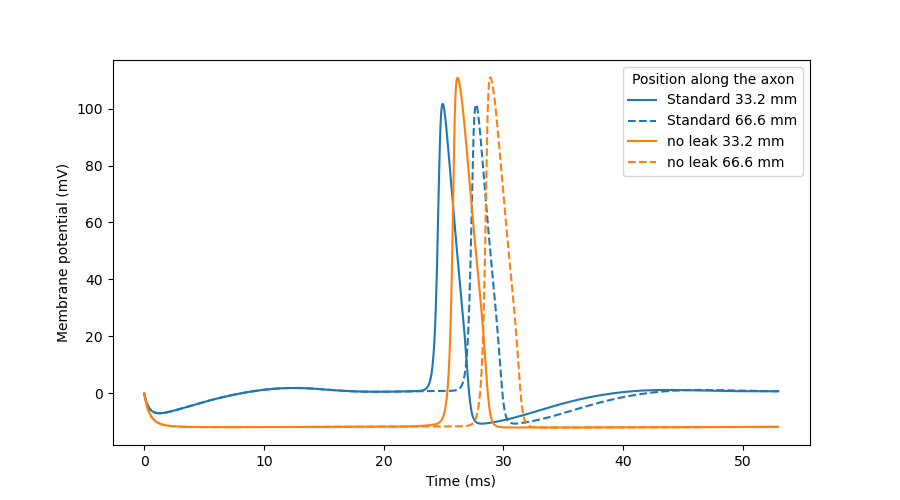

In [44]:
from scipy import stats

fig, ax = plt.subplots(1,1, figsize=(9,5))

for HH_parameter in HH_parameters:
    
    Cm = HH_parameter['Cm']
    Ri = HH_parameter['Ri']
    gl = HH_parameter['gl']
    diameter = HH_parameter['diameter']
    label = HH_parameter['label']
    
    start_scope()
    defaultclock.dt = 0.05*ms

    morpho = Cylinder(length=10*cm, diameter=diameter, n=500)

    El = 10.613*mV
    ENa = 115*mV
    EK = -12*mV
    gNa0 = 120*msiemens/cm**2
    gK = 36*msiemens/cm**2
    gl = gl

    # HH equations
    eqs = '''
    Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
    I : amp (point current) # applied current
    dm/dt = alpham * (1-m) - betam * m : 1
    dn/dt = alphan * (1-n) - betan * n : 1
    dh/dt = alphah * (1-h) - betah * h : 1
    alpham = (0.1/mV) * 10.0*mV/exprel((-v+25.0*mV)/(10.0*mV))/ms : Hz
    betam = 4 * exp(-v/(18.0*mV))/ms : Hz
    alphah = 0.07 * exp(-v/(20.0*mV))/ms : Hz
    betah = 1/(exp((-v+30.0*mV) / (10.0*mV)) + 1)/ms : Hz
    alphan = (0.01/mV) * 10.0*mV/exprel((-v+10.0*mV)/(10.0*mV))/ms : Hz
    betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
    gNa : siemens/meter**2
    '''

    neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                           refractory="m > 0.4", threshold="m > 0.5",
                           Cm=Cm, Ri=Ri)
    neuron.v = 0*mV
    neuron.h = 1
    neuron.m = 0
    neuron.n = .5
    neuron.I = 0*amp
    neuron.gNa = gNa0
    M = StateMonitor(neuron, ('v', 'gNa'), record=True)
    spikes = SpikeMonitor(neuron)


    la = neuron.space_constant[0]
    print('------------------- Running simulation ---------------------')
    print("Length constante: %s" % la.in_best_unit(2))
    print("Time constante:", (neuron.Cm[0]/gl).in_best_unit(2))
    print('------------------------  Start ----------------------------')

    run(20*ms, report='text')
    neuron.I[0] = 1*uA # current injection at one end
    run(3*ms)
    la = neuron.space_constant[0]
    print("Length constante: %s" % la.in_best_unit(2))
    neuron.I = 0*amp
    run(30*ms, report='text')

    # Calculation of velocity
    slope, intercept, r_value, p_value, std_err = stats.linregress(spikes.t/second,
                                                    neuron.distance[spikes.i]/meter)
    print('------------------------  Done  ----------------------------')
    print("  Velocity = %.2f m/s" % slope)
    
    i = morpho.n//3
    ln = ax.plot(M.t/ms, M.v[i,:]/mV, 
         label=label+' '+str(morpho.distance[i]-morpho.distance[0]))
    i = 2*morpho.n//3
    ax.plot(M.t/ms, M.v[i,:]/mV, '--', color=ln[0].get_color(),
         label=label+' '+str(morpho.distance[i]-morpho.distance[0]))
    legend(title='Position along the axon')
    ylabel('Membrane potential (mV)')
    xlabel('Time (ms)')

In [93]:
cm_len = Cm * (pi * neuron.diameter[0])
gstar_len = 100*siemens/meter**2 * (pi * neuron.diameter[0])
gstar_len.in_unit(siemens/meter)
ri_len = Ri/(pi * (0.5 * neuron.diameter[0])**2)

In [94]:
(1/(cm_len)) * sqrt(gstar_len/(2*ri_len))

12.96453223 * metre * second ** -1

# Supplementary material: Plotting the conductivities

The following section is just a demonstration how the above provided plots are generated. Understanding the following sections is not part of the Couse.

In [45]:
from scipy import stats

start_scope()
defaultclock.dt = 0.02*ms

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=100)

El = 10.613*mV

ENa = 115*mV
EK = -12*mV

gl = 0.4*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2

# HH equations
eqs = '''
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * 10.0*mV/exprel((-v+25.0*mV)/(10.0*mV))/ms : Hz
betam = 4 * exp(-v/(18.0*mV))/ms : Hz
alphah = 0.07 * exp(-v/(20.0*mV))/ms : Hz
betah = 1/(exp((-v+30.0*mV) / (10.0*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * 10.0*mV/exprel((-v+10.0*mV)/(10.0*mV))/ms : Hz
betan = 0.125*exp(-v/(80.0*mV))/ms : Hz
gNa : siemens/meter**2
gNaTotal = gNa * m**3 *h : siemens/meter**2
gKTotal = gK * n**4 : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                       #refractory="m > 0.4", threshold="m > 0.5",
                       Cm=1*uF/cm**2, Ri=35.4*ohm*cm)
neuron.v = 0*mV
neuron.h = 1
neuron.m = 0
neuron.n = .5
neuron.I = 0*amp
neuron.gNa = gNa0

M = StateMonitor(neuron, ('v', 'gNaTotal', 'gKTotal'), record=True)

la = neuron.space_constant[0]
print('------------------- Running simulation ---------------------')
print("Length constante: %s" % la.in_best_unit(2))
print("Time constante:", (neuron.Cm[0]/gl).in_best_unit(2))
print('------------------------  Start ----------------------------')

run(20*ms, report='text')
neuron.I[0] = 1*uA # current injection at one end
run(3*ms)
neuron.I = 0*amp
run(30*ms, report='text')

------------------- Running simulation ---------------------
Length constante: 3.56 mm
Time constante: 2.5 ms
------------------------  Start ----------------------------
Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Starting simulation at t=23. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s


In [46]:
prefactor = 26.7e-3 * volt
K_out_HH = K_in_standard *exp(-12*mV/prefactor )
#vm_goldmann(g_K=1e99, K_out=K_out_HH)*volt
Na_out_HH = Na_in_standard *exp(115*mV/prefactor )
#vm_goldmann(g_Na=1e99, Na_out=Na_out_HH)*volt

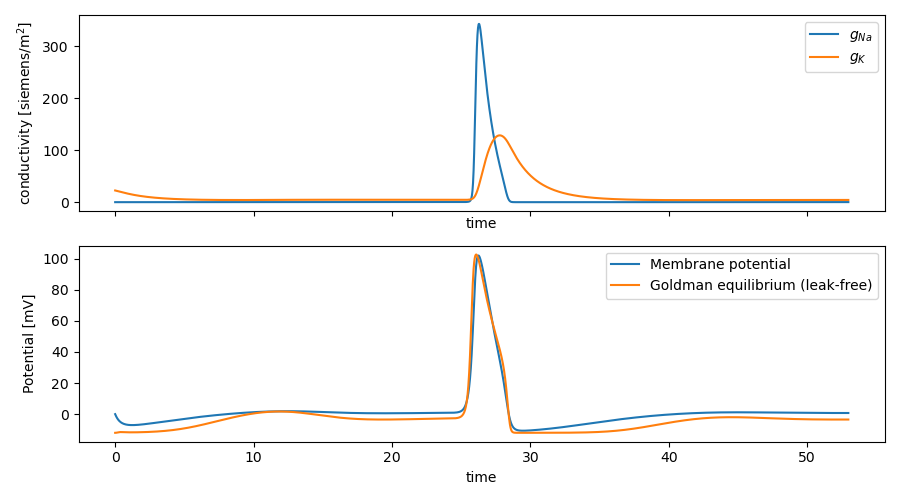

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(9, 5), sharex=True)
i = 50
gNatot = M.gNaTotal.T[:, i]
axs[0].plot(M.t/ms, M.gNaTotal.T[:, i]/(siemens/meter**2), label = '$g_{Na}$')
axs[0].plot(M.t/ms, M.gKTotal.T[:, i]/(siemens/meter**2), label = '$g_{K}$')

axs[0].set_ylabel('conductivity [siemens/m$^2$]')
axs[0].set_xlabel('time')
axs[0].legend()

axs[1].plot(M.t/ms, M.v.T[:, i]/mV, label='Membrane potential')
axs[1].plot(M.t/ms, vm_goldmann(g_Na=M.gNaTotal.T[:, i],
                                g_K=M.gKTotal.T[:, i],
                                Na_out=Na_out_HH,
                                K_out=K_out_HH,
                                )/mV, label = 'Goldman equilibrium (leak-free)')

axs[1].set_ylabel('Potential [mV]')
axs[1].set_xlabel('time')
axs[1].legend()
fig.tight_layout()